# 확률적 경사 하강법(SGD) 

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [ ]:
network = TwoLayerNet()
optimizer = SGD()

NameError: ignored

In [ ]:
# https://github.com/Lasagne/Lasagne/blob/master/lasagne/updates.py : 다양한 최적화 기법을 구현한 딥러닝 프레임워크

# 모멘텀 

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

# AdaGrad 

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.key():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

# Adam 

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

# MNIST 실습 

===========iteration:0===========
SGD:2.4040766738644153
Momentum:2.396039653163747
AdaGrad:2.1476593960826307
Adam:2.1969646129400022
===========iteration:100===========
SGD:1.5773228147566867
Momentum:0.34820249044082635
AdaGrad:0.15525263036192974
Adam:0.2997867932645507
===========iteration:200===========
SGD:0.6895905056116973
Momentum:0.1694847602367852
AdaGrad:0.05234136047417148
Adam:0.1074605698557276
===========iteration:300===========
SGD:0.546738018533155
Momentum:0.2803662835591188
AdaGrad:0.12312573748739786
Adam:0.18744419527685033
===========iteration:400===========
SGD:0.3987804364838984
Momentum:0.15044871096851994
AdaGrad:0.05224135258627653
Adam:0.09075982826262743
===========iteration:500===========
SGD:0.3044742194103518
Momentum:0.1164897812448242
AdaGrad:0.04810729501565424
Adam:0.09014619681683411
===========iteration:600===========
SGD:0.29697521214893036
Momentum:0.1585616942080236
AdaGrad:0.04539678153765753
Adam:0.12141991694694557
===========iteration:700=

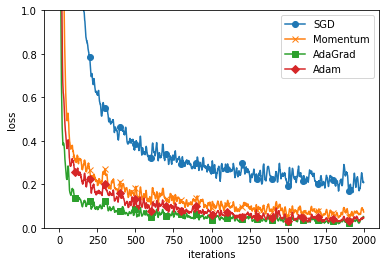

In [9]:
import sys
sys.path.append('C:\deep-learning-from-scratch-master')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 가중치의 초깃값 

은닉층의 활성화값 분포 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

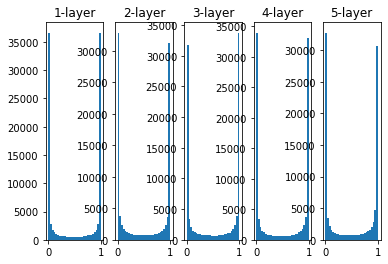

In [ ]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

In [ ]:
# 가중치의 표준편차 0.01로 변경

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

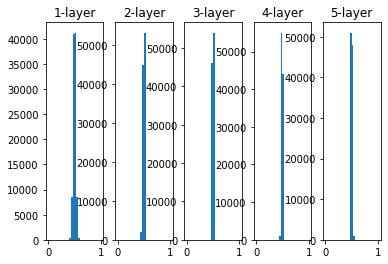

In [ ]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

In [ ]:
# 가중치의 표준편차 : Xavier 초깃값

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

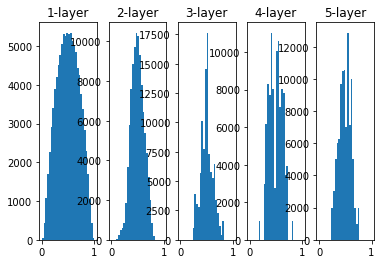

In [ ]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

Relu 함수를 활용 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z

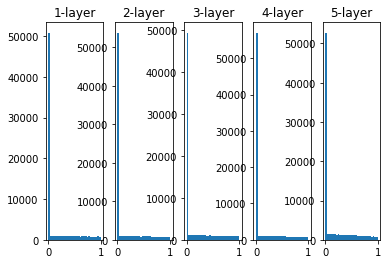

In [ ]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

===========iteration:0===========
std=0.01:2.302499997905586
Xavier:2.301907563149
He:2.398864913130154
===========iteration:100===========
std=0.01:2.3024255810731487
Xavier:2.2546775454110914
He:1.644562682384918
===========iteration:200===========
std=0.01:2.3022019117094494
Xavier:2.095296508899694
He:0.9320647635386038
===========iteration:300===========
std=0.01:2.301739081704973
Xavier:1.6674281278517187
He:0.5794137572965863
===========iteration:400===========
std=0.01:2.302482710654578
Xavier:1.1388070149675853
He:0.4761295556857562
===========iteration:500===========
std=0.01:2.301588201323903
Xavier:0.7821379500576837
He:0.4129838080244681
===========iteration:600===========
std=0.01:2.3014856258848777
Xavier:0.5486357219393889
He:0.2650720024144933
===========iteration:700===========
std=0.01:2.3010448148058114
Xavier:0.424272540717891
He:0.26659139524043884
===========iteration:800===========
std=0.01:2.304429210225079
Xavier:0.3513236851215383
He:0.22060977389946884
=====

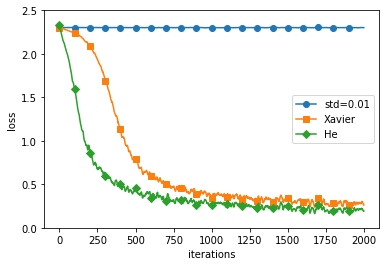

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 배치 정규화 

============== 1/16 ==============
epoch:0 | 0.099 - 0.089


../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.092
epoch:2 | 0.097 - 0.097
epoch:3 | 0.097 - 0.111
epoch:4 | 0.097 - 0.138
epoch:5 | 0.097 - 0.168
epoch:6 | 0.097 - 0.184
epoch:7 | 0.097 - 0.198
epoch:8 | 0.097 - 0.214
epoch:9 | 0.097 - 0.241
epoch:10 | 0.097 - 0.272
epoch:11 | 0.097 - 0.282
epoch:12 | 0.097 - 0.299
epoch:13 | 0.097 - 0.318
epoch:14 | 0.097 - 0.344
epoch:15 | 0.097 - 0.357
epoch:16 | 0.097 - 0.368
epoch:17 | 0.097 - 0.379
epoch:18 | 0.097 - 0.398


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.408
============== 2/16 ==============
epoch:0 | 0.117 - 0.061


../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.069
epoch:2 | 0.097 - 0.101
epoch:3 | 0.097 - 0.123
epoch:4 | 0.097 - 0.157
epoch:5 | 0.097 - 0.185
epoch:6 | 0.097 - 0.21
epoch:7 | 0.097 - 0.234
epoch:8 | 0.097 - 0.26
epoch:9 | 0.097 - 0.282
epoch:10 | 0.097 - 0.303
epoch:11 | 0.097 - 0.33
epoch:12 | 0.097 - 0.351
epoch:13 | 0.097 - 0.37
epoch:14 | 0.097 - 0.388
epoch:15 | 0.097 - 0.403
epoch:16 | 0.097 - 0.425
epoch:17 | 0.097 - 0.438
epoch:18 | 0.097 - 0.456


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.465
============== 3/16 ==============
epoch:0 | 0.116 - 0.144
epoch:1 | 0.391 - 0.147
epoch:2 | 0.538 - 0.169
epoch:3 | 0.648 - 0.205
epoch:4 | 0.756 - 0.246
epoch:5 | 0.8 - 0.274
epoch:6 | 0.835 - 0.32
epoch:7 | 0.89 - 0.357
epoch:8 | 0.912 - 0.391
epoch:9 | 0.946 - 0.422
epoch:10 | 0.964 - 0.447
epoch:11 | 0.968 - 0.472
epoch:12 | 0.98 - 0.494
epoch:13 | 0.983 - 0.516
epoch:14 | 0.988 - 0.549
epoch:15 | 0.994 - 0.56
epoch:16 | 0.994 - 0.581
epoch:17 | 0.995 - 0.602
epoch:18 | 0.997 - 0.619


No handles with labels found to put in legend.


epoch:19 | 0.997 - 0.632
============== 4/16 ==============
epoch:0 | 0.087 - 0.141
epoch:1 | 0.224 - 0.149
epoch:2 | 0.365 - 0.193
epoch:3 | 0.478 - 0.275
epoch:4 | 0.565 - 0.347
epoch:5 | 0.628 - 0.398
epoch:6 | 0.651 - 0.455
epoch:7 | 0.689 - 0.507
epoch:8 | 0.713 - 0.553
epoch:9 | 0.729 - 0.594
epoch:10 | 0.746 - 0.614
epoch:11 | 0.765 - 0.637
epoch:12 | 0.773 - 0.668
epoch:13 | 0.797 - 0.688
epoch:14 | 0.805 - 0.701
epoch:15 | 0.821 - 0.724
epoch:16 | 0.832 - 0.738
epoch:17 | 0.836 - 0.745
epoch:18 | 0.858 - 0.759


No handles with labels found to put in legend.


epoch:19 | 0.865 - 0.778
============== 5/16 ==============
epoch:0 | 0.075 - 0.083
epoch:1 | 0.087 - 0.12
epoch:2 | 0.103 - 0.239
epoch:3 | 0.108 - 0.383
epoch:4 | 0.127 - 0.491
epoch:5 | 0.141 - 0.577
epoch:6 | 0.146 - 0.639
epoch:7 | 0.159 - 0.683
epoch:8 | 0.168 - 0.72
epoch:9 | 0.173 - 0.755
epoch:10 | 0.183 - 0.777
epoch:11 | 0.197 - 0.796
epoch:12 | 0.209 - 0.806
epoch:13 | 0.23 - 0.82
epoch:14 | 0.242 - 0.835
epoch:15 | 0.256 - 0.846
epoch:16 | 0.261 - 0.861
epoch:17 | 0.258 - 0.867
epoch:18 | 0.274 - 0.873


No handles with labels found to put in legend.


epoch:19 | 0.272 - 0.87
============== 6/16 ==============
epoch:0 | 0.096 - 0.098
epoch:1 | 0.118 - 0.163
epoch:2 | 0.117 - 0.429
epoch:3 | 0.117 - 0.571
epoch:4 | 0.117 - 0.637
epoch:5 | 0.11 - 0.685
epoch:6 | 0.117 - 0.711
epoch:7 | 0.117 - 0.738
epoch:8 | 0.117 - 0.768
epoch:9 | 0.117 - 0.787
epoch:10 | 0.116 - 0.805
epoch:11 | 0.117 - 0.816
epoch:12 | 0.117 - 0.832
epoch:13 | 0.117 - 0.857
epoch:14 | 0.117 - 0.864
epoch:15 | 0.117 - 0.875
epoch:16 | 0.117 - 0.89
epoch:17 | 0.117 - 0.909
epoch:18 | 0.117 - 0.92


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.928
============== 7/16 ==============
epoch:0 | 0.105 - 0.138
epoch:1 | 0.105 - 0.373
epoch:2 | 0.116 - 0.581
epoch:3 | 0.116 - 0.658
epoch:4 | 0.116 - 0.725
epoch:5 | 0.116 - 0.78
epoch:6 | 0.116 - 0.813
epoch:7 | 0.116 - 0.844
epoch:8 | 0.116 - 0.866
epoch:9 | 0.116 - 0.886
epoch:10 | 0.116 - 0.909
epoch:11 | 0.116 - 0.924
epoch:12 | 0.116 - 0.935
epoch:13 | 0.116 - 0.947
epoch:14 | 0.116 - 0.966
epoch:15 | 0.116 - 0.97
epoch:16 | 0.116 - 0.98
epoch:17 | 0.116 - 0.982
epoch:18 | 0.116 - 0.984


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.989
============== 8/16 ==============
epoch:0 | 0.093 - 0.077
epoch:1 | 0.117 - 0.357
epoch:2 | 0.117 - 0.745
epoch:3 | 0.117 - 0.805
epoch:4 | 0.117 - 0.847
epoch:5 | 0.117 - 0.884
epoch:6 | 0.117 - 0.911
epoch:7 | 0.117 - 0.943
epoch:8 | 0.117 - 0.964
epoch:9 | 0.117 - 0.974
epoch:10 | 0.117 - 0.982
epoch:11 | 0.117 - 0.99
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 9/16 ==============
epoch:0 | 0.093 - 0.16
epoch:1 | 0.116 - 0.378
epoch:2 | 0.117 - 0.696
epoch:3 | 0.117 - 0.773
epoch:4 | 0.117 - 0.815
epoch:5 | 0.117 - 0.861
epoch:6 | 0.116 - 0.877
epoch:7 | 0.116 - 0.882
epoch:8 | 0.116 - 0.892
epoch:9 | 0.117 - 0.895
epoch:10 | 0.117 - 0.905
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.997
epoch:16 | 0.116 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.994


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.093 - 0.143
epoch:1 | 0.117 - 0.441
epoch:2 | 0.117 - 0.727
epoch:3 | 0.117 - 0.832
epoch:4 | 0.117 - 0.852
epoch:5 | 0.105 - 0.868
epoch:6 | 0.117 - 0.872
epoch:7 | 0.117 - 0.875
epoch:8 | 0.117 - 0.892
epoch:9 | 0.117 - 0.895
epoch:10 | 0.117 - 0.898
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.991
============== 11/16 ==============
epoch:0 | 0.116 - 0.198
epoch:1 | 0.116 - 0.727
epoch:2 | 0.116 - 0.784
epoch:3 | 0.116 - 0.788
epoch:4 | 0.116 - 0.812
epoch:5 | 0.116 - 0.859
epoch:6 | 0.116 - 0.88
epoch:7 | 0.116 - 0.857
epoch:8 | 0.116 - 0.886
epoch:9 | 0.116 - 0.887
epoch:10 | 0.116 - 0.898
epoch:11 | 0.116 - 0.898
epoch:12 | 0.116 - 0.898
epoch:13 | 0.116 - 0.929
epoch:14 | 0.116 - 0.988
epoch:15 | 0.116 - 0.986
epoch:16 | 0.117 - 0.983
epoch:17 | 0.117 - 0.992
epoch:18 | 0.117 - 0.971


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.992
============== 12/16 ==============
epoch:0 | 0.093 - 0.174
epoch:1 | 0.117 - 0.4
epoch:2 | 0.117 - 0.621
epoch:3 | 0.117 - 0.476
epoch:4 | 0.117 - 0.654
epoch:5 | 0.117 - 0.745
epoch:6 | 0.117 - 0.75
epoch:7 | 0.117 - 0.768
epoch:8 | 0.117 - 0.742
epoch:9 | 0.117 - 0.742
epoch:10 | 0.117 - 0.782
epoch:11 | 0.117 - 0.784
epoch:12 | 0.117 - 0.787
epoch:13 | 0.116 - 0.783
epoch:14 | 0.117 - 0.786
epoch:15 | 0.117 - 0.787
epoch:16 | 0.117 - 0.782
epoch:17 | 0.117 - 0.773
epoch:18 | 0.117 - 0.871


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.877
============== 13/16 ==============
epoch:0 | 0.097 - 0.102
epoch:1 | 0.116 - 0.525
epoch:2 | 0.116 - 0.588
epoch:3 | 0.105 - 0.571
epoch:4 | 0.117 - 0.575
epoch:5 | 0.116 - 0.674
epoch:6 | 0.117 - 0.672
epoch:7 | 0.117 - 0.69
epoch:8 | 0.117 - 0.69
epoch:9 | 0.117 - 0.68
epoch:10 | 0.117 - 0.687
epoch:11 | 0.117 - 0.695
epoch:12 | 0.117 - 0.69
epoch:13 | 0.117 - 0.678
epoch:14 | 0.117 - 0.701
epoch:15 | 0.117 - 0.705
epoch:16 | 0.117 - 0.707
epoch:17 | 0.117 - 0.709
epoch:18 | 0.117 - 0.711


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.712
============== 14/16 ==============
epoch:0 | 0.099 - 0.098
epoch:1 | 0.116 - 0.451
epoch:2 | 0.116 - 0.475
epoch:3 | 0.116 - 0.529
epoch:4 | 0.116 - 0.321
epoch:5 | 0.116 - 0.564
epoch:6 | 0.116 - 0.594
epoch:7 | 0.116 - 0.55
epoch:8 | 0.116 - 0.595
epoch:9 | 0.116 - 0.605
epoch:10 | 0.116 - 0.631
epoch:11 | 0.116 - 0.689
epoch:12 | 0.116 - 0.7
epoch:13 | 0.116 - 0.695
epoch:14 | 0.116 - 0.709
epoch:15 | 0.116 - 0.605
epoch:16 | 0.116 - 0.709
epoch:17 | 0.116 - 0.7
epoch:18 | 0.116 - 0.711


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.72
============== 15/16 ==============
epoch:0 | 0.1 - 0.176
epoch:1 | 0.117 - 0.266
epoch:2 | 0.117 - 0.374
epoch:3 | 0.116 - 0.397
epoch:4 | 0.116 - 0.375
epoch:5 | 0.116 - 0.363
epoch:6 | 0.116 - 0.416
epoch:7 | 0.116 - 0.434
epoch:8 | 0.116 - 0.429
epoch:9 | 0.116 - 0.432
epoch:10 | 0.116 - 0.42
epoch:11 | 0.116 - 0.433
epoch:12 | 0.116 - 0.433
epoch:13 | 0.116 - 0.429
epoch:14 | 0.117 - 0.43
epoch:15 | 0.116 - 0.431
epoch:16 | 0.116 - 0.435
epoch:17 | 0.117 - 0.434
epoch:18 | 0.117 - 0.437


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.435
============== 16/16 ==============
epoch:0 | 0.105 - 0.195
epoch:1 | 0.117 - 0.168
epoch:2 | 0.117 - 0.314
epoch:3 | 0.117 - 0.351
epoch:4 | 0.117 - 0.397
epoch:5 | 0.117 - 0.387
epoch:6 | 0.117 - 0.399
epoch:7 | 0.117 - 0.42
epoch:8 | 0.117 - 0.41
epoch:9 | 0.117 - 0.424
epoch:10 | 0.117 - 0.418
epoch:11 | 0.117 - 0.42
epoch:12 | 0.117 - 0.411
epoch:13 | 0.117 - 0.418
epoch:14 | 0.117 - 0.455
epoch:15 | 0.117 - 0.504
epoch:16 | 0.117 - 0.519
epoch:17 | 0.117 - 0.525
epoch:18 | 0.117 - 0.517
epoch:19 | 0.117 - 0.524


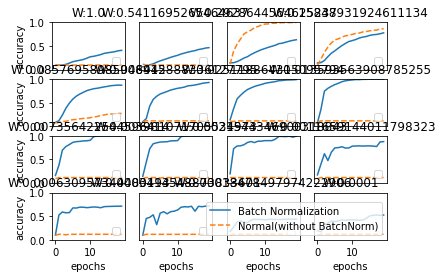

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# 오버피팅 

In [ ]:
# 일부로 오버피팅 만들기

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]


In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer= SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network. accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 가중치 감소 

epoch:0, train acc:0.10333333333333333, test acc:0.1019
epoch:1, train acc:0.10666666666666667, test acc:0.1126
epoch:2, train acc:0.13, test acc:0.1248
epoch:3, train acc:0.15666666666666668, test acc:0.1372
epoch:4, train acc:0.18, test acc:0.1505
epoch:5, train acc:0.19, test acc:0.1635
epoch:6, train acc:0.2, test acc:0.1707
epoch:7, train acc:0.20333333333333334, test acc:0.1762
epoch:8, train acc:0.23, test acc:0.1861
epoch:9, train acc:0.23333333333333334, test acc:0.1951
epoch:10, train acc:0.25, test acc:0.2052
epoch:11, train acc:0.25666666666666665, test acc:0.2151
epoch:12, train acc:0.27666666666666667, test acc:0.22
epoch:13, train acc:0.2866666666666667, test acc:0.2299
epoch:14, train acc:0.3, test acc:0.2383
epoch:15, train acc:0.30333333333333334, test acc:0.2466
epoch:16, train acc:0.3233333333333333, test acc:0.2545
epoch:17, train acc:0.3466666666666667, test acc:0.2665
epoch:18, train acc:0.36666666666666664, test acc:0.2736
epoch:19, train acc:0.39666666666666667

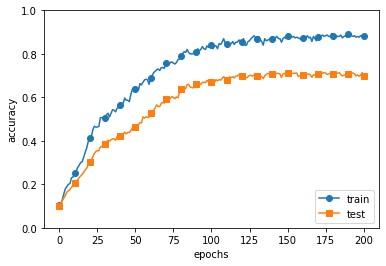

In [ ]:
import sys

sys.path.append('C:\deep-learning-from-scratch-master')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감소） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 드롭아웃 

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
        else:
            return x * (1.0 - self.dropout_ratio)
    def backward(self, dout):
        return dout * self.mask
    

train loss:2.3367050700377656
=== epoch:1, train acc:0.08, test acc:0.0835 ===
train loss:2.3208582695879305
train loss:2.308067234152686
train loss:2.3142216506639977
=== epoch:2, train acc:0.09, test acc:0.0872 ===
train loss:2.3027793640805485
train loss:2.3067840205216545
train loss:2.3008291749636585
=== epoch:3, train acc:0.09333333333333334, test acc:0.0916 ===
train loss:2.3233912456048142
train loss:2.2841207887127264
train loss:2.2873480835646145
=== epoch:4, train acc:0.1, test acc:0.0923 ===
train loss:2.29669446437113
train loss:2.2885539155648487
train loss:2.2933565537138176
=== epoch:5, train acc:0.10333333333333333, test acc:0.0929 ===
train loss:2.2974863900330167
train loss:2.2997401841337286
train loss:2.2937681868027266
=== epoch:6, train acc:0.09666666666666666, test acc:0.0966 ===
train loss:2.298195271271225
train loss:2.2950032518039474
train loss:2.2806372924340748
=== epoch:7, train acc:0.10666666666666667, test acc:0.1 ===
train loss:2.3007335845473538
train

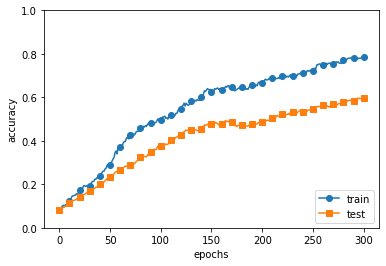

In [ ]:
import sys
sys.path.append('C:\deep-learning-from-scratch-master')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 적절한 하이퍼파라미터 값 찾기 

검증 데이터 분리 

In [ ]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터 뒤섞기
x_train, t_train = shuffle_dataset(x_train, t_train)
# 20% 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

하이퍼파라미터 최적화 구현하기 

val acc:0.09 | lr:0.00019244543624778707, weight decay:1.5306759458272307e-05
val acc:0.14 | lr:1.7839694293276863e-06, weight decay:3.820879256009749e-06
val acc:0.15 | lr:0.0001885367946584139, weight decay:1.2459946512180479e-06
val acc:0.17 | lr:0.00041060172314567585, weight decay:3.176856172694781e-08
val acc:0.17 | lr:5.526220302056136e-05, weight decay:2.7191847695017125e-05
val acc:0.1 | lr:0.00030109380919472734, weight decay:1.4193177854729477e-07
val acc:0.12 | lr:1.4069788707276762e-05, weight decay:4.8791487289391126e-08
val acc:0.15 | lr:0.0005582623114510633, weight decay:3.6106810075143843e-07
val acc:0.38 | lr:0.002694560284050588, weight decay:3.020378332165409e-05
val acc:0.43 | lr:0.002958234232085654, weight decay:1.531110943092176e-05
val acc:0.04 | lr:1.9327714015126183e-06, weight decay:3.184152810093872e-06
val acc:0.12 | lr:2.1828739595368855e-06, weight decay:1.2692472270578653e-08
val acc:0.11 | lr:2.2232503980458908e-05, weight decay:2.3938857008908587e-07

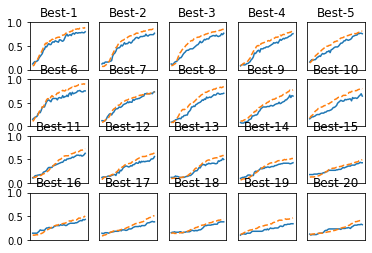

In [ ]:
import sys
sys.path.append('C:\deep-learning-from-scratch-master')
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()